In [4]:
#Data Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , None) #Show all columns of the data when explored

In [5]:
df=pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We drop the CustomerID column because it will not be necessary in the data analysis

In [ ]:
df=df.drop("customerID" , axis=1)

In [ ]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [68]:
df[df["tenure"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Customers with service duration less than a month had blank 'TotalCharges' column. We’ll replace them with 0.

In [ ]:
df['TotalCharges']= df['TotalCharges'].replace(" " , 0)
df['TotalCharges']= df['TotalCharges'].astype(float)
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

From the dataset information, there are no null values recorded.

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The SeniorCitizen column is encoded as:

    0 for non-senior customers
    1 for senior customers

For better readability during analysis and visualization, we’ll convert these to categorical values:

    0 → No
    1 → Yes


In [ ]:
def conv(value):
 if value == 1:
  return "Yes"
 else:
  return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

Changing Total Charges Data Type to float

In [ ]:
df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We want to check the data of the customers whose tenure value was 0

In [ ]:
df[df["tenure"]==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Only 11 customers had a tenure of 0, implying that they are new customers. Since there are only a few of them, we can do away with them.

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df[["tenure","MonthlyCharges","TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df["SeniorCitizen"].value_counts()

,count
SeniorCitizen,
No,5890
Yes,1142


In [ ]:
df[["SeniorCitizen","tenure"]].value_counts()

SeniorCitizen  tenure
No             1         527
               72        306
               2         195
               3         175
               4         150
                        ... 
Yes            42          8
               48          7
               36          7
               63          7
               39          6
Name: count, Length: 144, dtype: int64

In [ ]:
df[["PhoneService","MultipleLines"]].value_counts()

PhoneService  MultipleLines   
Yes           No                  3385
              Yes                 2967
No            No phone service     680
Name: count, dtype: int64

In [ ]:
df[["PhoneService","InternetService"]].value_counts()

PhoneService  InternetService
Yes           Fiber optic        3096
              DSL                1736
              No                 1520
No            DSL                 680
Name: count, dtype: int64

In [ ]:
df[["PhoneService","OnlineSecurity"]].value_counts()
#

PhoneService  OnlineSecurity     
Yes           No                     3098
              Yes                    1734
              No internet service    1520
No            No                      399
              Yes                     281
Name: count, dtype: int64

In [ ]:
df[["PhoneService","OnlineBackup"]].value_counts()

PhoneService  OnlineBackup       
Yes           No                     2693
              Yes                    2139
              No internet service    1520
No            No                      394
              Yes                     286
Name: count, dtype: int64

In [ ]:
df[["PhoneService","MultipleLines"]].value_counts()

PhoneService  MultipleLines   
Yes           No                  3385
              Yes                 2967
No            No phone service     680
Name: count, dtype: int64

In [ ]:
df[["PhoneService","Churn"]].value_counts()

PhoneService  Churn
Yes           No       4653
              Yes      1699
No            No        510
              Yes       170
Name: count, dtype: int64

In [ ]:
df[["SeniorCitizen","Churn"]].value_counts()
#

SeniorCitizen  Churn
No             No       4497
               Yes      1393
Yes            No        666
               Yes       476
Name: count, dtype: int64

In [ ]:
df[["InternetService","Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,1957
Fiber optic,No,1799
No,No,1407
Fiber optic,Yes,1297
DSL,Yes,459
No,Yes,113


In [ ]:
df[["InternetService","PhoneService","Churn"]].value_counts().unstack()

Churn                           No   Yes
InternetService PhoneService            
DSL             No             510   170
                Yes           1447   289
Fiber optic     Yes           1799  1297
No              Yes           1407   113

In [ ]:
df[["tenure","Churn"]].value_counts(ascending=True).head(20)

,,count
tenure,Churn,
64,Yes,4
63,Yes,4
62,Yes,5
45,Yes,6
44,Yes,6
60,Yes,6
72,Yes,6
71,Yes,6
57,Yes,8


In [ ]:
df[["tenure","Churn"]].value_counts(ascending=True).tail(20)

,,count
tenure,Churn,
18,No,73
64,No,76
66,No,76
12,No,79
7,No,80
8,No,81
4,Yes,83
69,No,87
67,No,88


In [ ]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [ ]:
df[["Contract","Churn"]].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
Two year        No       1637
One year        No       1306
                Yes       166
Two year        Yes        48
Name: count, dtype: int64

In [ ]:
df[["SeniorCitizen","Contract","Churn"]].value_counts()

SeniorCitizen  Contract        Churn
No             Month-to-month  No       1854
               Two year        No       1498
               Month-to-month  Yes      1214
               One year        No       1145
Yes            Month-to-month  Yes       441
                               No        366
               One year        No        161
               Two year        No        139
No             One year        Yes       137
               Two year        Yes        42
Yes            One year        Yes        29
               Two year        Yes         6
Name: count, dtype: int64

In [69]:
df["PaymentMethod"].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [71]:
df[["PaymentMethod","Churn"]].value_counts().unstack()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [77]:
df[["SeniorCitizen","Churn"]].value_counts()

SeniorCitizen  Churn
No             No       4497
               Yes      1393
Yes            No        666
               Yes       476
Name: count, dtype: int64

In [73]:
df[["SeniorCitizen","PaymentMethod","Churn"]].value_counts().unstack()

Churn                                      No  Yes
SeniorCitizen PaymentMethod                       
No            Bank transfer (automatic)  1104  205
              Credit card (automatic)    1130  170
              Electronic check           1017  754
              Mailed check               1246  264
Yes           Bank transfer (automatic)   180   53
              Credit card (automatic)     159   62
              Electronic check            277  317
              Mailed check                 50   44

In [74]:
df[["SeniorCitizen","Partner","Dependents","Churn"]].value_counts().unstack()

Churn                               No  Yes
SeniorCitizen Partner Dependents           
No            No      No          1872  847
                      Yes          276   75
              Yes     No           921  242
                      Yes         1428  229
Yes           No      No           285  276
                      Yes            6    2
              Yes     No           312  178
                      Yes           63   20

In [75]:
df[["SeniorCitizen","Partner","Dependents","Contract","Churn"]].value_counts().unstack()

Churn                                                No    Yes
SeniorCitizen Partner Dependents Contract                     
No            No      No         Month-to-month  1051.0  783.0
                                 One year         443.0   50.0
                                 Two year         378.0   14.0
                      Yes        Month-to-month   134.0   66.0
                                 One year          77.0    7.0
                                 Two year          65.0    2.0
              Yes     No         Month-to-month   304.0  190.0
                                 One year         245.0   40.0
                                 Two year         372.0   12.0
                      Yes        Month-to-month   365.0  175.0
                                 One year         380.0   40.0
                                 Two year         683.0   14.0
Yes           No      No         Month-to-month   190.0  264.0
                                 One year          54.0   11.0
                                 Two year          41.0    1.0
                      Yes        Month-to-month     5.0    2.0
                                 One year           1.0    NaN
              Yes     No         Month-to-month   145.0  159.0
                                 One year          83.0   16.0
                                 Two year          84.0    3.0
                      Yes        Month-to-month    26.0   16.0
                                 One year          23.0    2.0
                                 Two year          14.0    2.0

In [76]:
df[["SeniorCitizen","Partner","Dependents","Contract","PaymentMethod","Churn"]].value_counts().unstack()

Churn                                                                         No  \
SeniorCitizen Partner Dependents Contract       PaymentMethod                      
No            No      No         Month-to-month Bank transfer (automatic)  157.0   
                                                Credit card (automatic)    161.0   
                                                Electronic check           367.0   
                                                Mailed check               366.0   
                                 One year       Bank transfer (automatic)  100.0   
...                                                                          ...   
Yes           Yes     Yes        One year       Credit card (automatic)      4.0   
                                                Electronic check            12.0   
                                 Two year       Bank transfer (automatic)    6.0   
                                                Credit card (automatic)      6.0   
                                                Electronic check             2.0   

Churn                                                                        Yes  
SeniorCitizen Partner Dependents Contract       PaymentMethod                     
No            No      No         Month-to-month Bank transfer (automatic)   88.0  
                                                Credit card (automatic)     80.0  
                                                Electronic check           438.0  
                                                Mailed check               177.0  
                                 One year       Bank transfer (automatic)   12.0  
...                                                                          ...  
Yes           Yes     Yes        One year       Credit card (automatic)      NaN  
                                                Electronic check             1.0  
                                 Two year       Bank transfer (automatic)    NaN  
                                                Credit card (automatic)      2.0  
                                                Electronic check             NaN  

[86 rows x 2 columns]

In [78]:
df.corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


There is a stronger correlation between tenure and total charges.

In [81]:
df["gender"].value_counts(normalize=True)*100

,proportion
gender,
Male,50.469283
Female,49.530717


In [82]:
df["SeniorCitizen"].value_counts(normalize=True)*100

,proportion
SeniorCitizen,
No,83.759954
Yes,16.240046


In [83]:
df["Partner"].value_counts(normalize=True)*100

,proportion
Partner,
No,51.749147
Yes,48.250853


In [84]:
df["Dependents"].value_counts(normalize=True)*100

,proportion
Dependents,
No,70.150739
Yes,29.849261


Visualization

<Axes: >

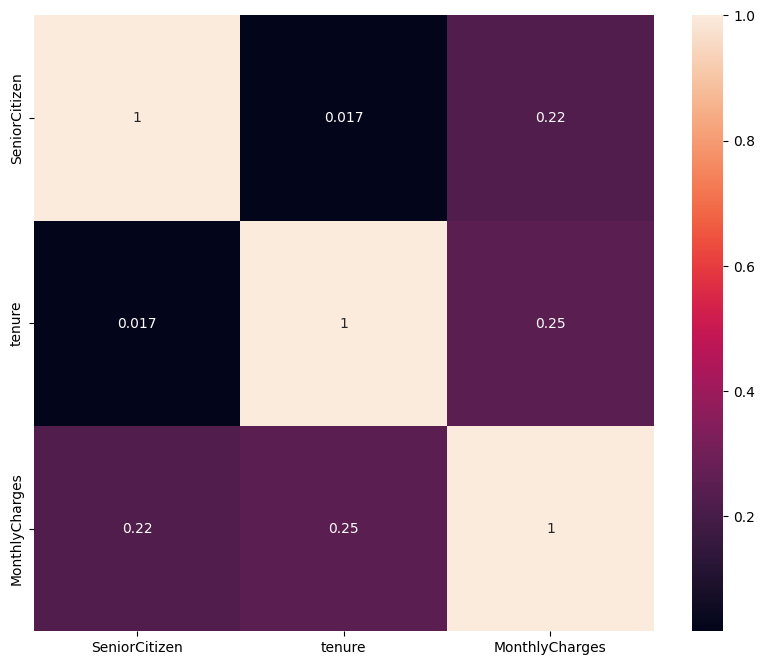

In [6]:
#Heatmap AND Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)